In [157]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

In [185]:
print(os.getcwd())
df = pd.read_csv('results-20.csv')
df

/home/marta/Kacper


,method,N,M,P,execution_time,work_performed,energy
0,dijkstra,43,80,1,5.977792,6.461958,NaN
1,dijkstra,64,122,1,20.169200,21.582573,NaN
2,dijkstra,124,232,1,134.376919,142.411703,NaN
3,dijkstra,263,503,1,1290.919060,1353.515098,NaN
4,dijkstra,353,689,1,2990.745276,3126.939937,NaN
...,...,...,...,...,...,...,...
120,MatMul,43,80,25,0.157972,3.874703,NaN
121,MatMul,64,122,25,0.467556,11.578887,NaN
122,MatMul,124,232,25,4.388481,109.436937,NaN
123,MatMul,263,503,25,67.046832,1674.994976,NaN


In [192]:
methods = ['dijkstra', 'dijkstra_nospeedup', 'SPFA', 'SPFA_nospeedup', 'MatMul']

for method in methods:
    for p in range(1, 6):
        n_cores = p*p
        this_p = df[(df['P'] == n_cores) & (df['method'] == method)]
#         print(this_p)
    
#     print('\n\n\n')

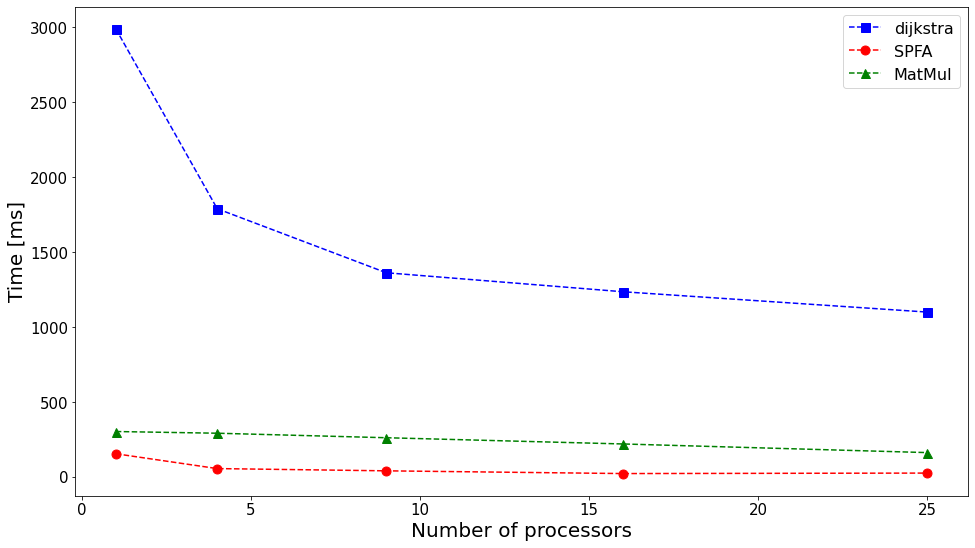

In [108]:
main_methods = ['dijkstra', 'SPFA', 'MatMul']
graph_size = 353
style = ['b--s', 'r--o', 'g--^']

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
plt.xlabel('Number of processors', fontsize=20)
plt.ylabel('Time [ms]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for i in range(3):
    m = main_methods[i]
    f = df[(df['method'] == m) & (df['N']==graph_size)]
    ax.plot(f['P'], f['execution_time'], style[i], markersize=9, label=m)

ax.legend(fontsize=16);

plt.show()

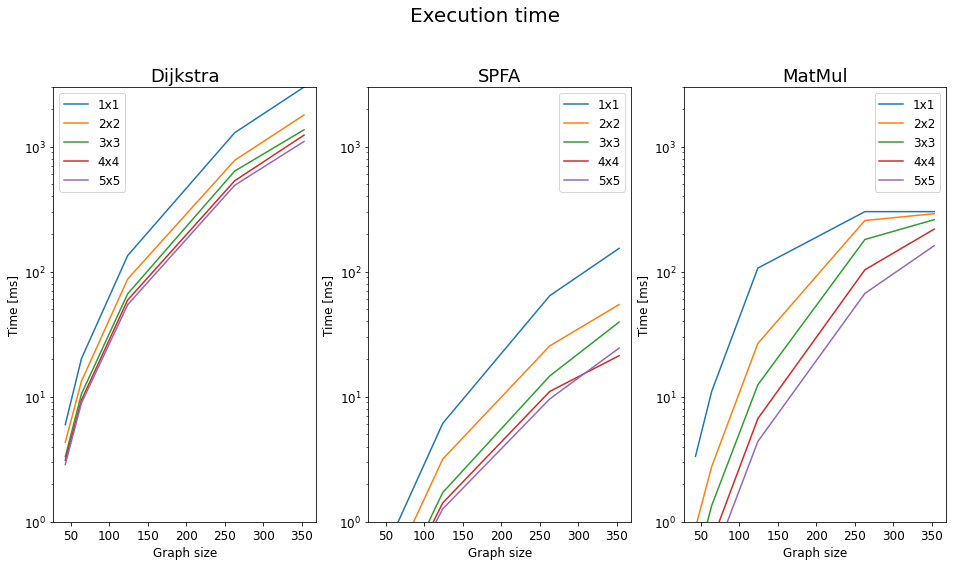

In [198]:
# Time graphs
main_methods = ['dijkstra', 'SPFA', 'MatMul']
titles = ['Dijkstra', 'SPFA', 'MatMul']
# style = ['b--s', 'r--o', 'g--^']   # representing number of cores
cores = ['0','1x1', '2x2', '3x3', '4x4', '5x5']

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
fig, ax = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(16, 8)
fig.suptitle('Execution time', fontsize=20, y=1.02)


for i in range(3):
    m = main_methods[i]
    for j in range(1,6):
        f = df[(df['method'] == m) & (df['P'] == j*j)]
        ax[i].set_title(titles[i], fontsize=18)
        ax[i].set_xlabel('Graph size', fontsize=12)
        ax[i].set_ylabel('Time [ms]', fontsize=12)    
        ax[i].set_ylim(1,3000)
        ax[i].set_yscale('log')
        ax[i].plot(f['N'], f['execution_time'], markersize=9, label=cores[j])
        
    ax[i].legend(fontsize=12)

plt.show()

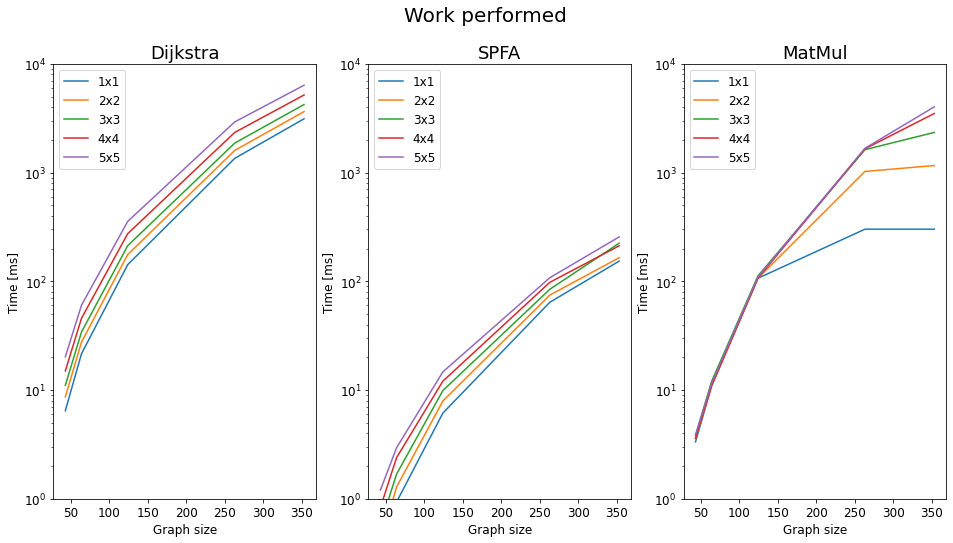

In [197]:
# Work performed graphs
main_methods = ['dijkstra', 'SPFA', 'MatMul']
titles = ['Dijkstra', 'SPFA', 'MatMul']
# style = ['b--s', 'r--o', 'g--^']   # representing number of cores
cores = ['0','1x1', '2x2', '3x3', '4x4', '5x5']

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
fig, ax = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(16, 8)
fig.suptitle('Work performed', fontsize=20)


for i in range(3):
    m = main_methods[i]
    for j in range(1,6):
        f = df[(df['method'] == m) & (df['P'] == j*j)]
        ax[i].set_title(titles[i], fontsize=18)
        ax[i].set_xlabel('Graph size', fontsize=12)
        ax[i].set_ylabel('Time [ms]', fontsize=12)    
        ax[i].set_ylim(1,10000)
        ax[i].set_yscale('log')
        ax[i].plot(f['N'], f['work_performed'], markersize=9, label=cores[j])
        
    ax[i].legend(fontsize=12, loc='upper left')

plt.show()